## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

In [175]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

## Function to Save Figures

In [176]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [177]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [178]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [179]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [131]:
xt = X_test.drop('avg_grade',axis=1)

In [180]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [181]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn_contrib_py_1R import OneRClassifier

# Create the 1R classifier and fit it to the training data
classifier = OneRClassifier()
classifier.fit(X, y)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(X_test['alc'], y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']] 
y_test = X_test['alc']
X_test = X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [ ]:
y_train

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

In [ ]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

In [ ]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))

## DESCISION TREE

In [172]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [173]:
x= X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y=X_train['alc']
y_test=X_test['alc']
X_test= X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]




In [174]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(x, y)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.579


Max Depth =  1 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  2 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  3 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  4 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  5 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  6 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  7 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  8 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  9 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  10 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  11 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  12 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  13 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  14 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  15 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  18 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  19 , T

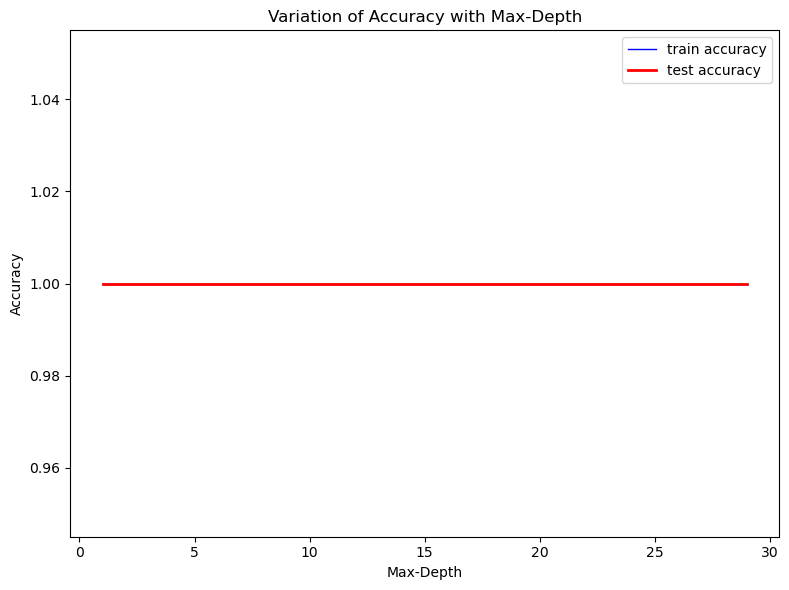

In [185]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();